In [1]:
# Import these libraries: Geopandas, Pandas and Matplotlip.pyplot & contextily 
import contextily as ctx 
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt 

<b>Instructions:</b> 


* <span style='font-family:Georgia'> Read the Neighbourhood Data in the Assignment folder
    

</div>

In [4]:
import os 
import pathlib
os.chdir('..')
path = pathlib.Path().resolve()

In [5]:
ndf = gpd.read_file(f'{path}/data/AssignmentData/Neighborhoods_Philadelphia/Neighborhoods_Philadelphia.shp')
ndf.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."


<span style='font-family:Georgia'> Read the Swimming Pool Dataset in the Assignment Folder
</div>

In [6]:
sp_df = gpd.read_file(f'{path}/data/AssignmentData/swimming_pools.shp')
sp_df.head()

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
0,1,Fox Chase Pool,Fox Chase Recreation Center,7901 RIDGEWAY ST,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.08232 40.07367)
1,2,Mitchell Pool,Thomas Mitchell Memorial Playground,3600 WHITEHALL LN,19114,OUTDOOR,ACTIVE,None,2012-01-01,Capital 2019; Finder,POINT (-74.99143 40.06830)
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.07590 40.05629)
3,4,Jacobs Pool,George Jacobs Playground,4500 LINDEN AVE,19136,OUTDOOR,ACTIVE,None,None,Aquatics 2019; Finder,POINT (-75.00284 40.05266)
4,5,Morris Estates Pool,Morris Estate Cultural Center,1610 CHELTEN AVE,19141,OUTDOOR,ACTIVE,Emergency access is from Chelten around the bu...,None,Finder; Administration,POINT (-75.14641 40.04992)


## 1. Overlay Maps


<span style='font-family:Georgia'> Create and Overlay Map of the two datasets (Neighbourhoods and swimming pools). Use Matplotlib fig, ax = plt.subplots and pass each ax to the two plots
</div>

<AxesSubplot: >

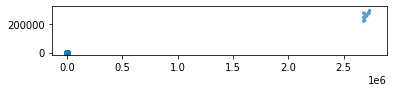

In [7]:
fig, ax = plt.subplots(1,1)

ndf.plot(ax=ax)
sp_df.plot(ax=ax)


<span style='font-family:Georgia'> That was not the plot as we might have Excpected it. Can you think of a reason why this went wrong. Fix it (Hint: CRS)
</div>

In [8]:
sp_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
ndf.crs

<Derived Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich


    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Reproject the pools data to the same CRS of the polygon data
* <span style='font-family:Georgia'> Plot now the reprojected data and the polygons together.
    

</div>

In [10]:
sp_df = sp_df.to_crs(epsg=2272)

<AxesSubplot: >

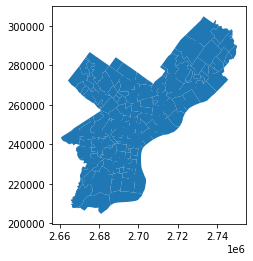

In [11]:
fig, ax = plt.subplots(1,1)

sp_df.plot(ax=ax)
ndf.plot(ax=ax)


    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> You might not see the Points. Hint all the points and the polygon data are all using Geopandas default color Blue. Change the color of both datasets to a color of your choice.

</div>

<AxesSubplot: >

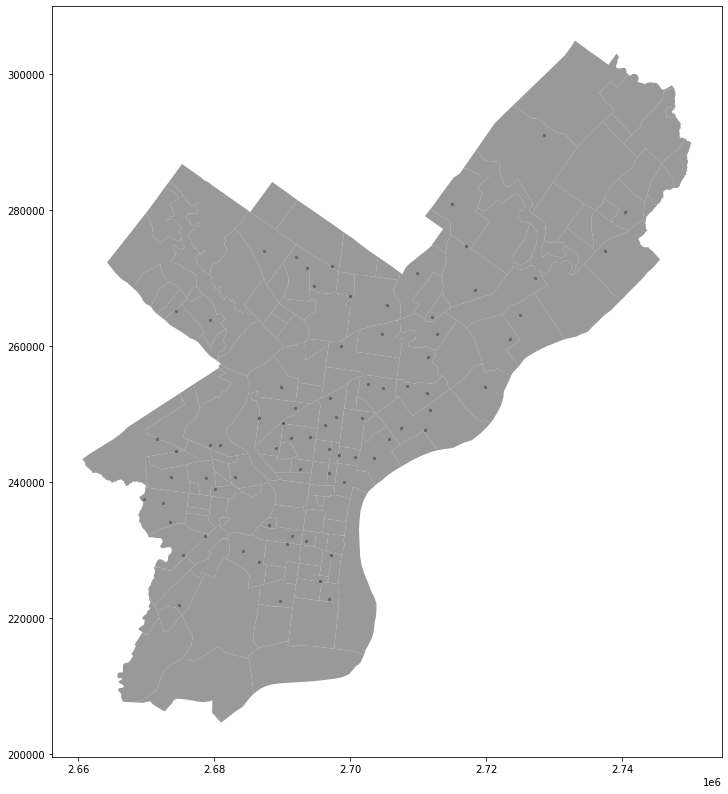

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12,16))

sp_df.plot(ax=ax, color = 'black', markersize = 5)
ndf.plot(ax=ax, color = 'grey', alpha=0.8)

## 2. Add Basemaps


    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Create a the simming pool points map with a base map. Use Contextly. Do not forget to project the swimming pools datse to epsg 3857 to work properly with Contextly.
    
* <span style='font-family:Georgia'> Hint (contextly has add_basemap), You might use Stamen TonerLite for your first basemap

</div>



In [13]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava'])

In [14]:
sp_df_3857 = sp_df.to_crs(epsg=3857)

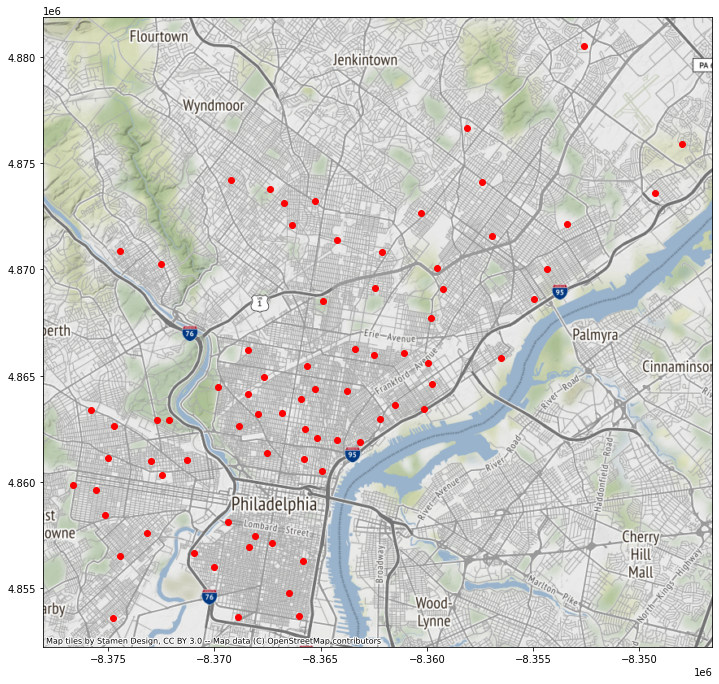

In [15]:
ax = sp_df_3857.plot(color='red', figsize=(12,16))

ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)

## 3. Choropleth Map



    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Create a choropleth map from the Crime counts dataset we created in the last step of the 3.6 assignment.
    
* <span style='font-family:Georgia'> You might copy the Geojson file we have created to your current folder

</div>


In [16]:
neig_counts = gpd.read_file(f'{path}/outputs/neig_count.geojson') 
incidents = gpd.read_file(f'{path}/outputs/incidents_clean.shp') 

In [17]:
incidents.head()

,objectid,dc_dist,psa,dispatch_d,dispatch_1,dispatch_t,hour_,dc_key,location_b,ucr_genera,text_gener,point_x,point_y,lat,lng,geometry
0,129,9,2,25/03/2020 18:32,25/03/2020,18:32:00,18,2.020090e+11,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446,POINT (-75.16145 39.96233)
1,41,77,A,08/03/2020 19:08,08/03/2020,19:08:00,19,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
2,42,77,A,15/03/2020 18:41,15/03/2020,18:41:00,18,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
3,43,77,A,18/03/2020 08:17,18/03/2020,08:17:00,8,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
4,44,77,A,03/04/2020 15:32,03/04/2020,15:32:33,15,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)


In [18]:
neig_counts.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,COUNT,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,142,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,413,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,281,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,134,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,279,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."



<b>Instructions:</b> 


* <span style='font-family:Georgia'> Create a Choropleth Map with the Counts Column

</div>


<AxesSubplot: >

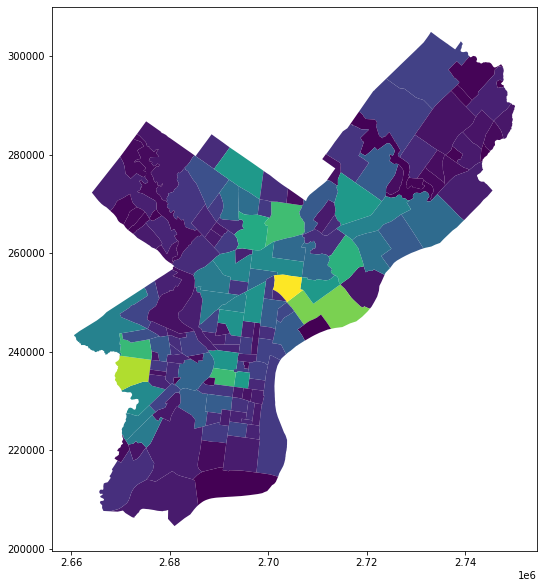

In [19]:
neig_counts.plot(column='COUNT', figsize=(12,10))


    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Normalize the Counts column with the Shape_are column. Divide the counts to the shape area and multiply with 100. Call the new column any name you want.

</div>


In [20]:
neig_counts['COUNTS_NORM'] = (neig_counts.COUNT / neig_counts.Shape_Area) * 100 

In [21]:
neig_counts.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,COUNT,geometry,COUNTS_NORM
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,142,"POLYGON ((2719789.837 256235.538, 2719814.855 ...",0.000318
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,413,"POLYGON ((2733378.171 289259.945, 2732818.985 ...",0.000362
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,281,"POLYGON ((2685267.950 279747.336, 2685272.265 ...",0.001130
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,134,"POLYGON ((2678490.151 284400.400, 2678518.732 ...",0.000168
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,279,"POLYGON ((2686769.727 263625.367, 2686921.108 ...",0.000688



<b>Instructions:</b> 


* <span style='font-family:Georgia'> Create a choropleth Map. Use the normalized column you have create above. Set legend=True to see the legend.

</div>


<AxesSubplot: >

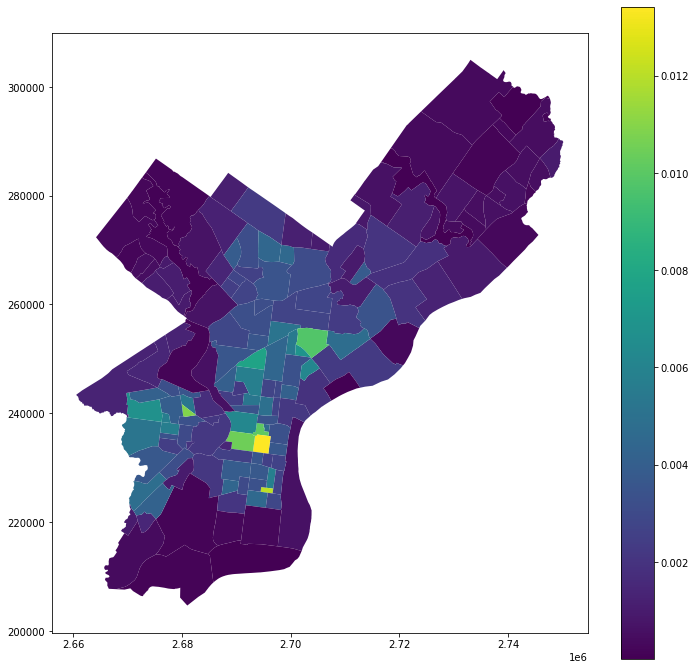

In [22]:
neig_counts.plot(column = 'COUNTS_NORM', figsize=(12,12), legend = True)